In [3]:
import json
from nanodet.collision.topview_handler import TopView360Handler
import numpy as np
import  matplotlib.pyplot as plt
import cv2

In [4]:
with open(f'calib/cameraData.json', 'r') as f:
    calib_data = json.load(f)
    calib_data = calib_data['Items']
    
bev_mapping = TopView360Handler(calib_data, num_channels=3, dX=0.1, dY = 0.1, grid_rows=180, 
                                    grid_cols=160, borderValue=0)

In [5]:
data = {}
data['front'] = cv2.imread("samples/image_1_1666166760959_seg.png")
data['left'] =  cv2.imread("samples/image_2_1666166760983_seg.png")
data['rear'] =  cv2.imread("samples/image_0_1666166760836_seg.png")
data['right'] =  cv2.imread("samples/image_3_1666166760935_seg.png")
topview = bev_mapping.handle(data)

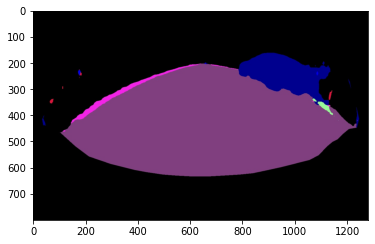

In [6]:
plt.imshow(cv2.cvtColor(data['rear'],cv2.COLOR_BGR2RGB))

In [7]:
# uv_map = np.loadtxt("calib/rearVUV.txt")

# uv_map[:,0] = uv_map[:,0]*1280
# uv_map[:,1] = uv_map[:,1]*800
# uv_map = uv_map.reshape(60,144,2)

In [8]:
# topview = np.zeros(bev_mapping.topview_size, dtype=fe_images[0].dtype)
# rear_full = cv2.remap(data['rear'], uv_map.astype(np.float32), None, 
                 # interpolation=cv2.INTER_NEAREST, borderMode=cv2.BORDER_CONSTANT,borderValue=0)
# plt.imshow(cv2.cvtColor(rear_full,cv2.COLOR_BGR2RGB))

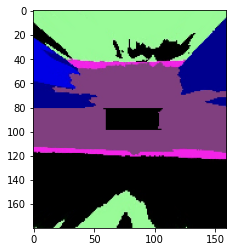

In [9]:
plt.imshow(cv2.cvtColor(topview,cv2.COLOR_BGR2RGB))

In [41]:
data = {}
data['front'] = cv2.imread("samples/image_1_1666166760959.png")
data['left'] =  cv2.imread("samples/image_2_1666166760983.png")
data['rear'] =  cv2.imread("samples/image_0_1666166760836.png")
data['right'] =  cv2.imread("samples/image_3_1666166760935.png")
topview = bev_mapping.handle(data)

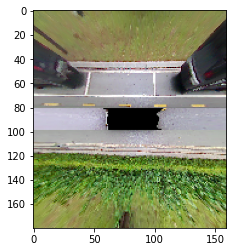

In [42]:
plt.imshow(cv2.cvtColor(topview,cv2.COLOR_BGR2RGB))

In [43]:
print(len(bev_mapping.uv_maps))
print(bev_mapping.uv_maps[2].shape)

4
(180, 160, 2)


In [44]:
bev_mapping.bev_alphas[0]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [45]:
# topview = np.zeros(bev_mapping.topview_size, dtype=fe_images[0].dtype)
rear_full = cv2.remap(data['rear'], bev_mapping.uv_maps[2],None, 
                 interpolation=cv2.INTER_NEAREST, borderMode=cv2.BORDER_CONSTANT,borderValue=0)

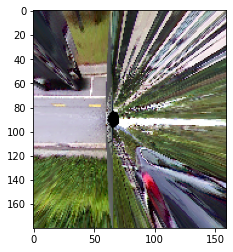

In [46]:
plt.imshow(cv2.cvtColor(rear_full,cv2.COLOR_BGR2RGB))

In [47]:
data['rear'].shape

(800, 1280, 3)

In [71]:
x_fisheye = 312 #1000 #1000
y_fisheye = 122 #550 #550
# points = np.array([[[x_fisheye, y_fisheye]]]).astype(np.float32)
# newcameramtx = cv2.fisheye.estimateNewCameraMatrixForUndistortRectify(
#     bev_mapping.K, bev_mapping.D, (1280,720), None, balance=1)

# dst = cv2.fisheye.undistortPoints(points, bev_mapping.K, bev_mapping.D, None, newcameramtx).astype(int)[0][0]
# print(dst)
# # center_coordinates_v0 = bev_mapping.mappixels[(bev_mapping.mappixels[:,0]==dst[0]) & (bev_mapping.mappixels[:,1]==dst[1])][:,2:][0]
# # center_coordinates_v1 = bev_mapping.mappixels[(bev_mapping.mappixels[:,0]==x_fisheye) & (bev_mapping.mappixels[:,1]==y_fisheye)][:,2:][0]
# # print(center_coordinates_v0)
# # print(center_coordinates_v1)


# map_1 = np.array([x_fisheye, 900, 200, dst[0]], dtype=np.float32)
# map_2 = np.array([y_fisheye, 500, 100, dst[1]], dtype=np.float32)
# track_pos_color = cv2.remap(src=data['rear'], dst=bev_mapping.uv_maps[2], map1=map_1, map2=map_2, 
#                  interpolation=cv2.INTER_NEAREST, borderMode=cv2.BORDER_CONSTANT,borderValue=0)
# track_pos_color

In [72]:
# r=0
# g=1
# b=2
# r_query = track_pos_color[3][0][0]
# g_query = track_pos_color[3][0][1]
# b_query = track_pos_color[3][0][2]
# print(r_query,g_query,b_query)
# center_coordinates = np.where((rear_full[:,:,r] == r_query) & (rear_full[:,:,g] == g_query) & (rear_full[:,:,b] == b_query))
# print(center_coordinates)

In [73]:
# bev_mapping.mappixels.astype(int)

## Visualization

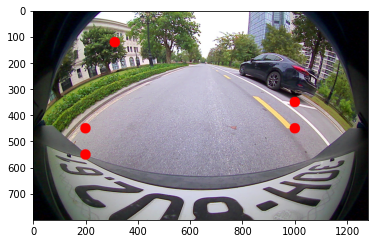

In [74]:
# Radius of circle
radius = 20
# Blue color in BGR
color = (0, 0, 255)
# Line thickness of 2 px
thickness = -1
# Using cv2.circle() method
# Draw a circle with blue line borders of thickness of 2 px
fe_image = cv2.circle(data['rear'], (x_fisheye,y_fisheye), radius, color, thickness)
plt.imshow(cv2.cvtColor(fe_image,cv2.COLOR_BGR2RGB))

In [75]:
test_p = np.array([x_fisheye, y_fisheye])
# test_h = np.array([680, 159])
test_x, test_y = bev_mapping.pixcel2global(test_p[0], test_p[1], z_global = 0.0, camPos = 2)
# test_z = bev_mapping.heigh_estimation_X(test_h[0], test_h[1], x_global = test_x, camPos = 2)
# test_z = bev_mapping.heigh_estimation_Y(test_h[0], test_h[1], y_global = test_y, camPos = 2)
print(test_x, test_y)

964 677 652 555
-0.6828539157379983 1.4583218316403768


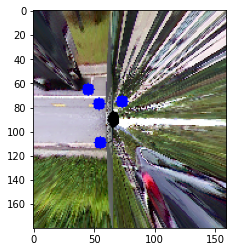

In [76]:
# Radius of circle
radius = 5
# Blue color in BGR
color = (255, 0, 0)
# Using cv2.circle() method
# Draw a circle with blue line borders of thickness of 2 px
image = cv2.circle(rear_full, (int(80+10*test_x),int(90-10*test_y)), radius, color, thickness=-1)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [70]:
# # Radius of circle
# radius = 5
# # Blue color in BGR
# color = (255, 0, 0)
# # Using cv2.circle() method
# # Draw a circle with blue line borders of thickness of 2 px
# image = cv2.circle(rear_full, (int(center_coordinates[0][1]),int(center_coordinates[0][0])), radius, color, thickness=-1)
# plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [55]:
# Read Image
image = cv2.imread('./calib_high/image2global/calib/img' + str(2) +'.png')
window_name = 'Image'
radius = 5
color = (255, 0, 0)
thickness = 1
font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 2

679 232 -1 0
9.97974845517003
8.706935823362668


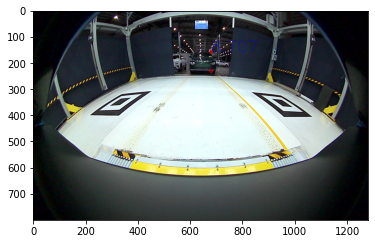

In [32]:
#xe e34 xanh
test_p = np.array([680, 232])
test_h = np.array([680, 159])
test_x, test_y = bev_mapping.pixcel2global(test_p[0], test_p[1], z_global = 0.0, camPos = 2)
test_z = bev_mapping.heigh_estimation_X(test_h[0], test_h[1], x_global = test_x, camPos = 2)
print(test_z)
test_z = bev_mapping.heigh_estimation_Y(test_h[0], test_h[1], y_global = test_y, camPos = 2)
print(test_z)
image = cv2.circle(image, test_h, radius, (0,0,255), 2)
image = cv2.circle(image, test_p, radius, (0,0,255), 2)
output = str(round(test_z,3))
image = cv2.putText(image, output, test_h,font, fontScale, color, thickness, cv2.LINE_AA)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [ ]:
# # Radius of circle
# radius = 3
# # Blue color in BGR
# color = (0, 0, 255)
# # Using cv2.circle() method
# # Draw a circle with blue line borders of thickness of 2 px
# image = cv2.circle(rear_full, (int(center_coordinates_v0[0]),int(center_coordinates_v0[1])), radius, color, thickness=-1)
# image = cv2.circle(image, (int(center_coordinates_v1[0]),int(center_coordinates_v1[1])), radius, (255,0,0), thickness=-1)
# plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))